# Design an ensemble classifier and plot the confusion matrix and ROC for the test dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('../datasets/testdata.csv',sep=',')
names=data.columns
print(names)

print(len(names))
cell_features=data.iloc[:,1:116].values
y=data.iloc[:,0].values

le=LabelEncoder()
y_true=le.fit_transform(y)

Index(['labelsC2', 'g.s', 'g.p', 'g.pdm', 'g.pdsd', 'g.effr', 'g.acirc',
       'g.sf', 'g.theta', 'g.l1',
       ...
       'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24'],
      dtype='object', length=116)
116


In [2]:
# class distribution
print(data.groupby('labelsC2').size())

labelsC2
a    1075
b     938
c    1508
l     875
o    1069
dtype: int64


In [3]:
#Normalize
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
test_size=0.3
seed=0

X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(cell_features,y_true,test_size=test_size,random_state=seed)


#Normalize training to improve performance
#we can use minmax scaling or standard scaler based scaling
stdSlr = StandardScaler().fit(X_train)
X_train = stdSlr.transform(X_train)

#Normalize test dataset same as training dataset
stdtestslr=StandardScaler().fit(X_test)
X_test=stdtestslr.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_test)

(3825, 115)
(1640, 115)
(1640,)
[2 2 1 ..., 4 0 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

num_folds = 10
num_instances=len(X_train)
seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_validation.cross_val_score(ensemble,  X_train, Y_train, cv=kfold)
print(results.mean())


0.870853553511


In [5]:
print(ensemble)
ensemble_Classifier=ensemble.fit(X_train,Y_train)
print(ensemble_Classifier)

y_pred=ensemble_Classifier.predict(X_test)
print(y_pred)

test_accuracy=ensemble_Classifier.score(X_test,Y_test)
print("Ensemble classifier score on testing dataset is:",test_accuracy)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('cart',...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)
VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('cart',...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)
[2 2 1 ..., 4 0 1]
Ensemble classifier score on testing data

Confusion matrix
[[300   9   4   4   9]
 [ 15 193   7  16  33]
 [  2   5 438  10   0]
 [  5  24   5 236   7]
 [  6  24   2   7 279]]


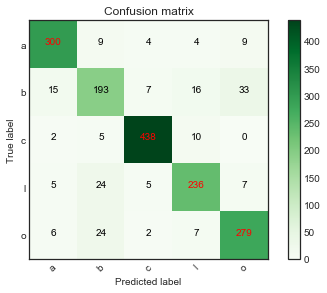

In [6]:
import numpy as np

#function taken from scikit documentation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plt.style.use('seaborn-white')

class_names=['a','b','c','l','o']

cnf_matrix=confusion_matrix(Y_test,y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix')

plt.show()




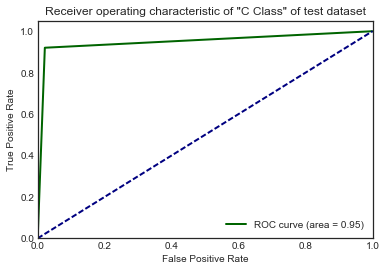

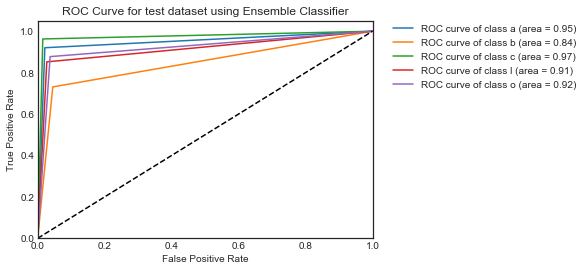

In [9]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(Y_test,y_pred):
    y=label_binarize(Y_test, classes=[0,1,2,3,4])
    y_pred=label_binarize(y_pred,classes=[0,1,2,3,4])
    n_classes=y.shape[1]
    
    
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i],_=roc_curve(y[:,i],y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    fpr["micro"],tpr["micro"],_=roc_curve(y.ravel(),y_pred.ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    #added classnames
    class_names=['a','b','c','l','o']

    #Plot of a ROC curve for a specific class of the cell
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkgreen',
             lw=lw, label='ROC curve (area = %0.2f)' %roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of "C Class" of test dataset')
    plt.legend(loc="lower right")
    plt.show()
    
    for i in range(n_classes):
    #print i
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(class_names[i], roc_auc[i]))
    plt.rcParams['legend.fontsize'] = 10.0
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for test dataset using Ensemble Classifier')
    # Place a legend to the right of this smaller subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(Y_test,y_pred)       

To Do for participants:
Design an ensemble majority voting classifier using LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier
GaussianNB and compare the performance between the above and the new classifier. Upload your solutions or email us your jupyter Notebook files.